In [1]:
import macine_learning_util as mlu
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

## Load data set

In [2]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

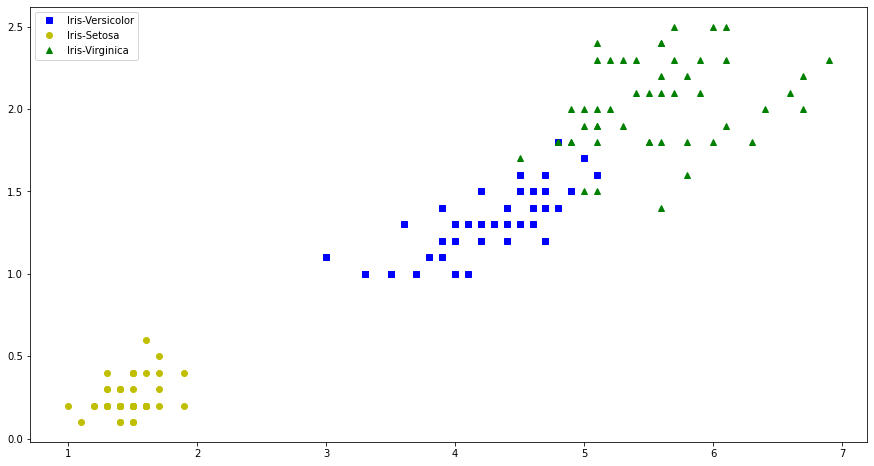

In [3]:
plt.figure(figsize=(15, 8))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.legend()

## Decision Trees for Classification

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4090909090909091, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5909090909090909, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.36363636363636365, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.18181818181818182, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.5454545454545454, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.454545454

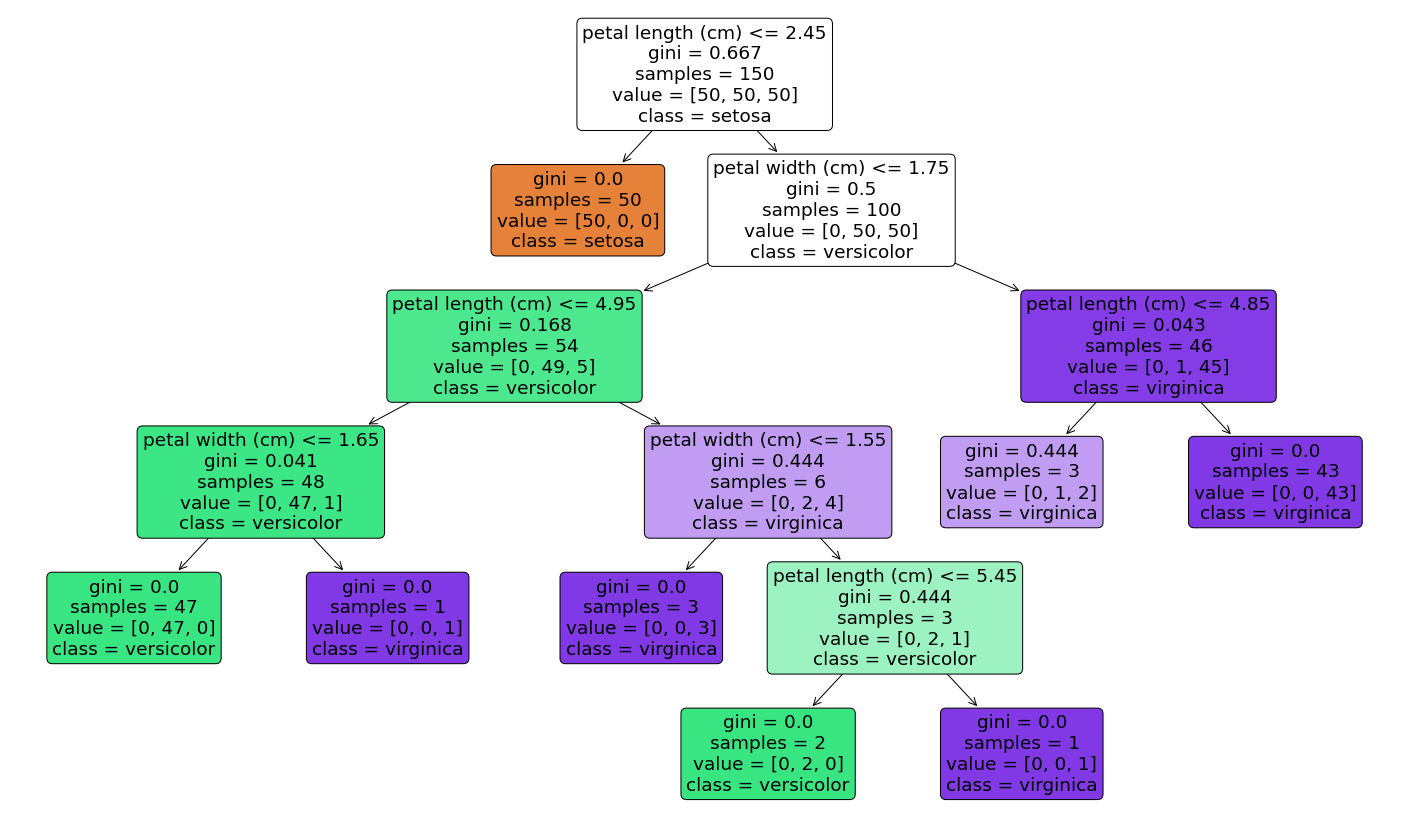

In [5]:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=iris.feature_names[2:],class_names=iris.target_names)

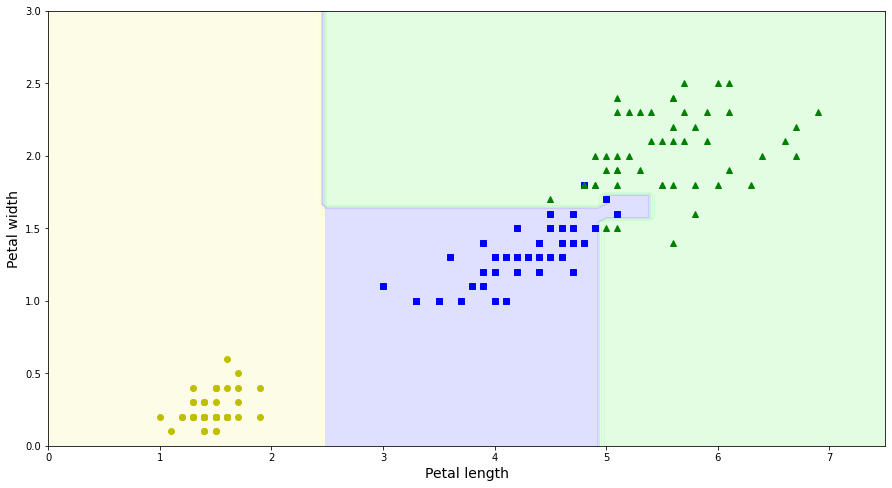

In [6]:
plt.figure(figsize=(15, 8))
mlu.plot_decision_boundary(clf, X, y)

### Regularization for Decision Trees

In [7]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25)

In [8]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

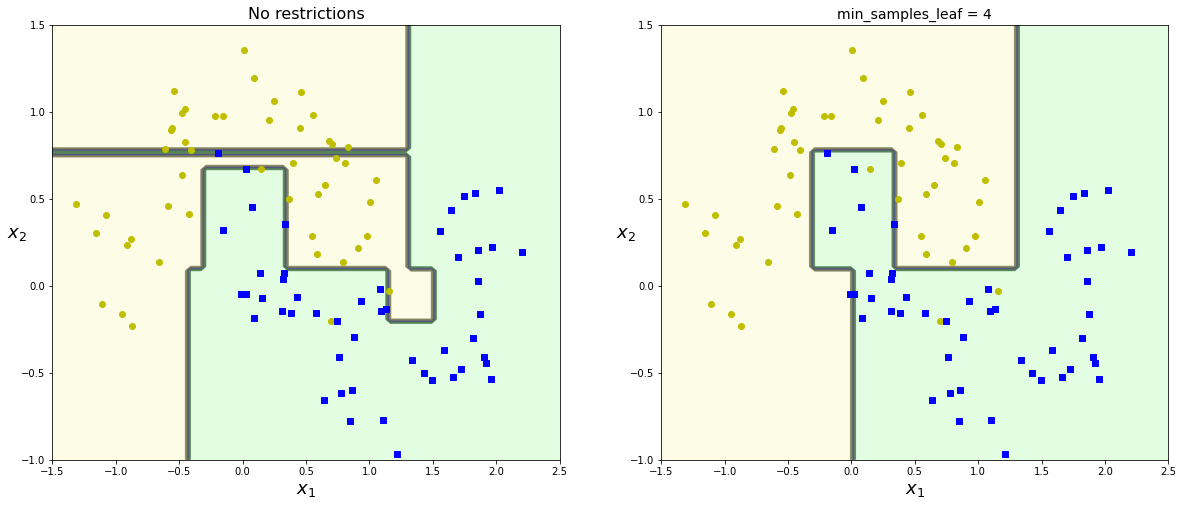

In [9]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
mlu.plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
mlu.plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.show()

In [10]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

DecisionTreeClassifier(random_state=42)

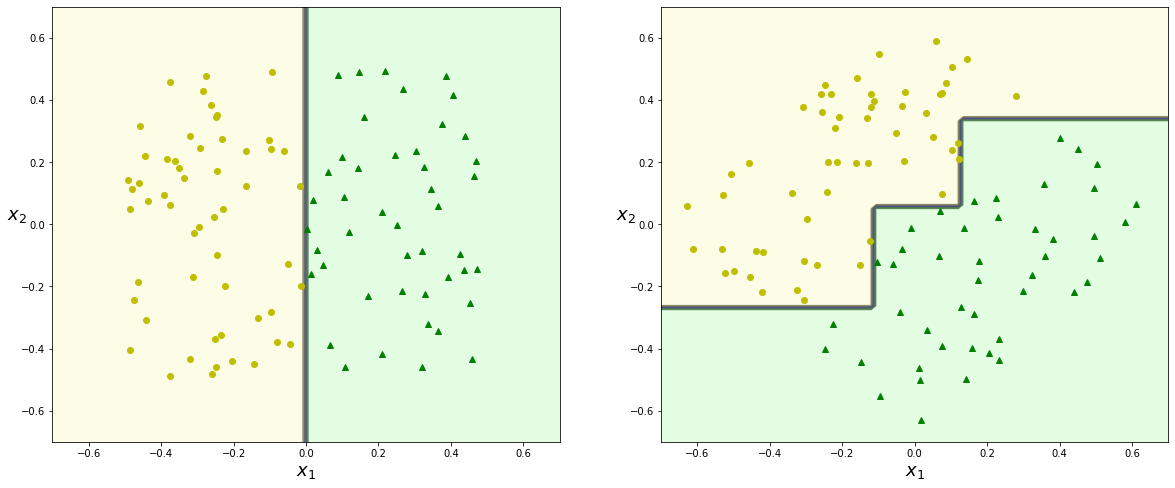

In [11]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
mlu.plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
mlu.plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.show()

### Decision Trees for Regression

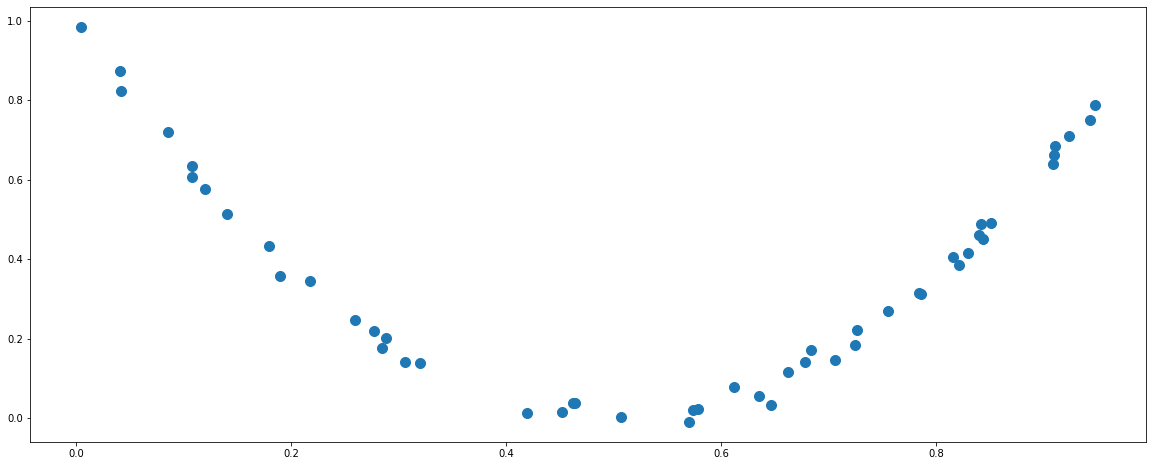

In [12]:
m = 50
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 50

plt.figure(figsize=(20, 8))
plt.plot(X,y,'.',ms=20)

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(min_samples_leaf=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=2)

[Text(0.3272058823529412, 0.95, 'X[0] <= 0.16\nsquared_error = 0.073\nsamples = 50\nvalue = 0.35'),
 Text(0.0784313725490196, 0.85, 'X[0] <= 0.064\nsquared_error = 0.023\nsamples = 8\nvalue = 0.716'),
 Text(0.0392156862745098, 0.75, 'squared_error = 0.005\nsamples = 3\nvalue = 0.893'),
 Text(0.11764705882352941, 0.75, 'X[0] <= 0.114\nsquared_error = 0.005\nsamples = 5\nvalue = 0.61'),
 Text(0.0784313725490196, 0.65, 'squared_error = 0.002\nsamples = 3\nvalue = 0.654'),
 Text(0.1568627450980392, 0.65, 'squared_error = 0.001\nsamples = 2\nvalue = 0.544'),
 Text(0.5759803921568627, 0.85, 'X[0] <= 0.801\nsquared_error = 0.052\nsamples = 42\nvalue = 0.28'),
 Text(0.3480392156862745, 0.75, 'X[0] <= 0.268\nsquared_error = 0.015\nsamples = 29\nvalue = 0.153'),
 Text(0.23529411764705882, 0.65, 'X[0] <= 0.203\nsquared_error = 0.004\nsamples = 4\nvalue = 0.345'),
 Text(0.19607843137254902, 0.55, 'squared_error = 0.001\nsamples = 2\nvalue = 0.395'),
 Text(0.27450980392156865, 0.55, 'squared_error 

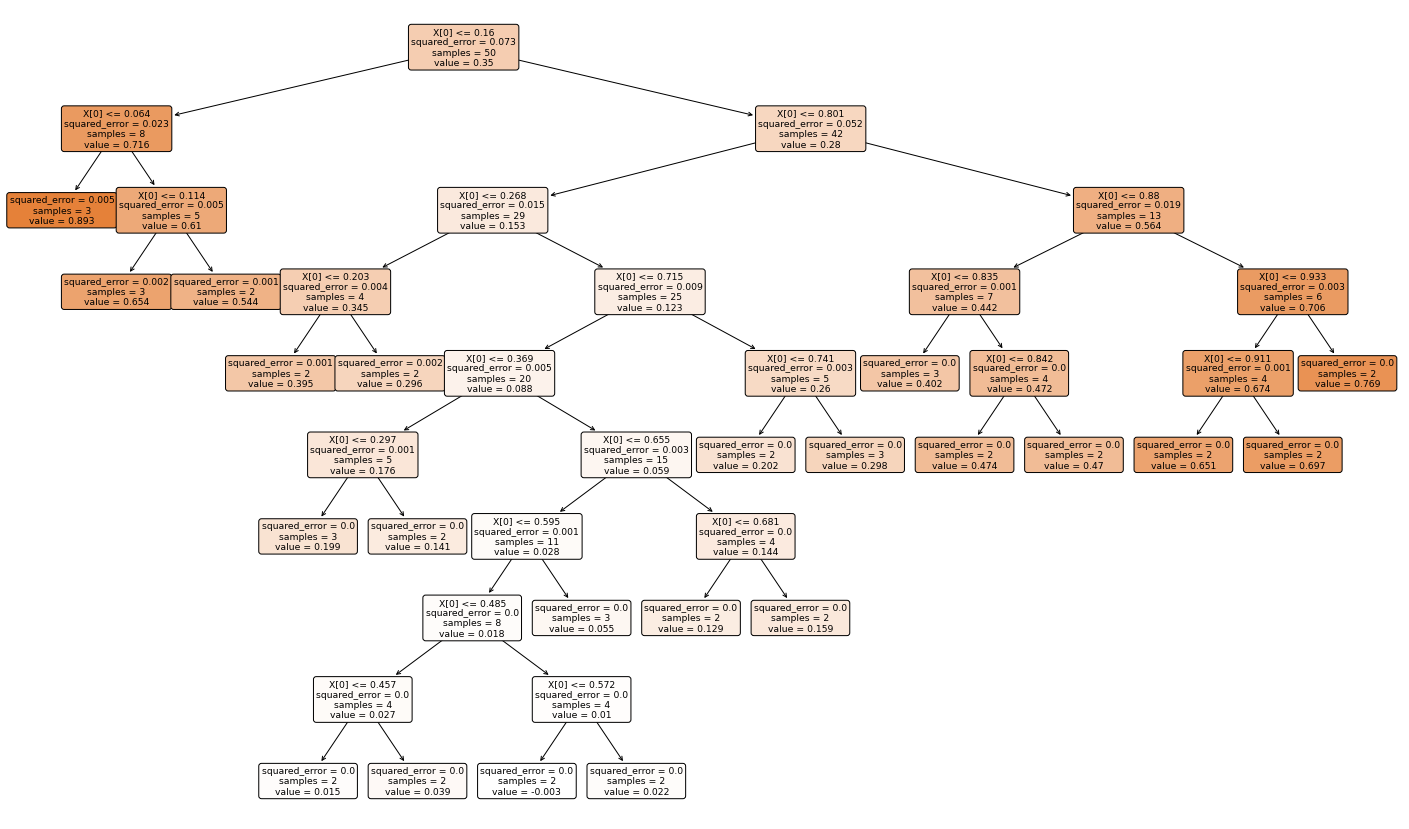

In [14]:
plt.figure(figsize=(25, 15))
tree.plot_tree(tree_reg,filled=True,rounded=True)

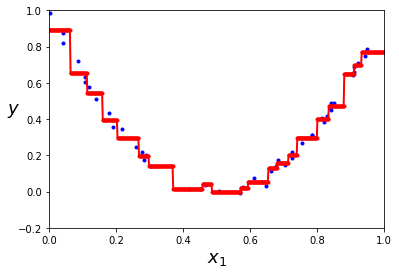

In [15]:
mlu.plot_regression_predictions(tree_reg, X, y)

In [16]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=1000)
clf.fit(X,y)

C:\Users\rcpsi\AppData\Local\Temp/ipykernel_18680/87877670.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X,y)


RandomForestRegressor(n_estimators=1000)

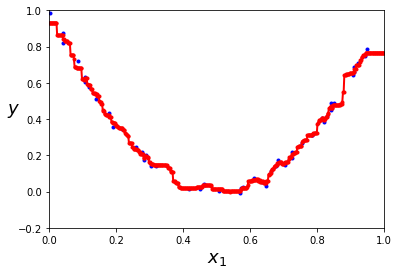

In [17]:
mlu.plot_regression_predictions(clf, X, y)